In [2]:
import numpy as np
import pandas as pd

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import glob
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils.vis_utils import plot_model
from PIL import Image

In [3]:
train_directory="..///data//archive//chest_xray//train//"
val_directory="..//data//archive//chest_xray//val//"
test_directory="..//data//archive//chest_xray//test//"
input_path="..//data//archive//chest_xray//"

In [4]:
data_dir = train_directory
class_names=os.listdir(train_directory)
# class_names.pop()
print(class_names)

['NORMAL', 'PNEUMONIA']


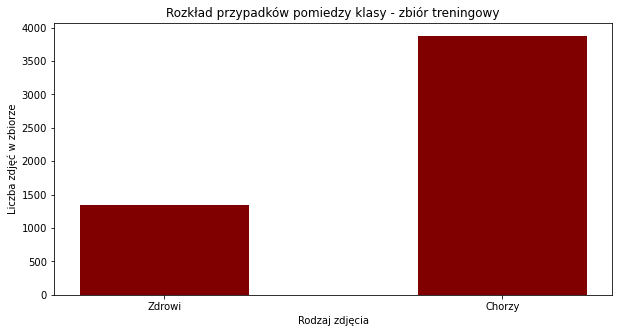

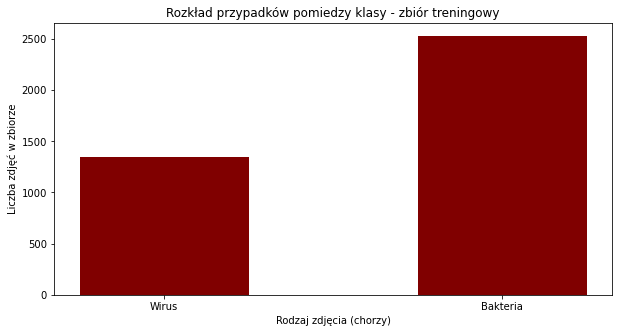

Set type: train, normal images: 1341, pneumonia images: 3875


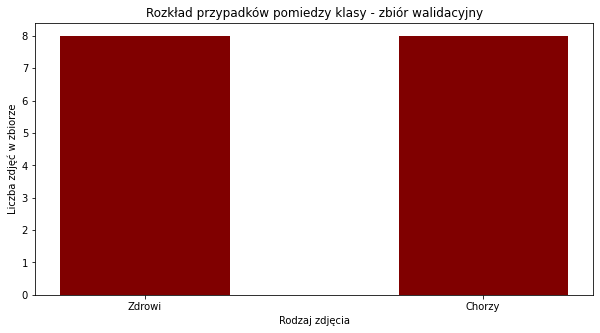

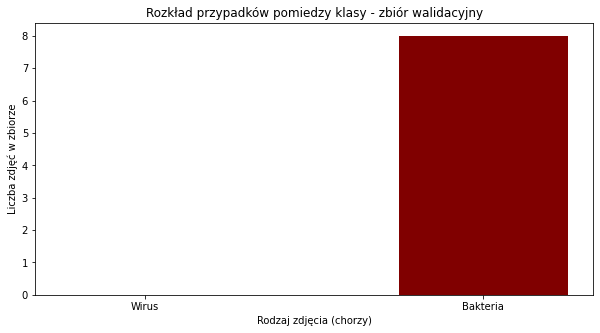

Set type: val, normal images: 8, pneumonia images: 8


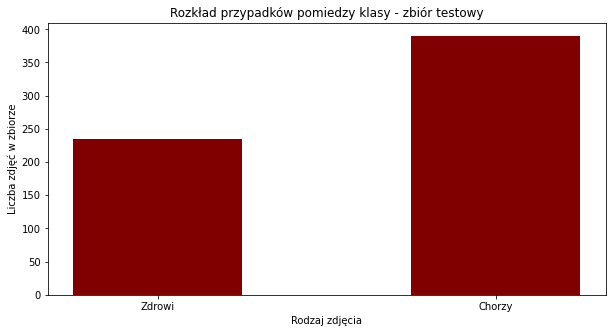

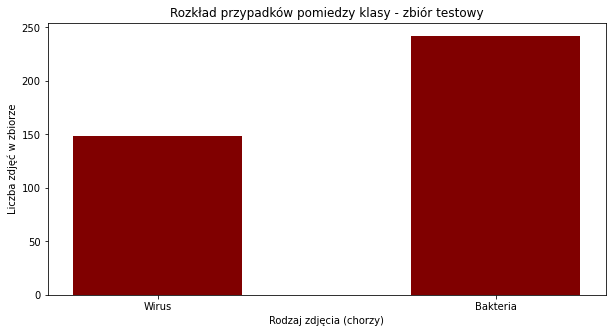

Set type: test, normal images: 234, pneumonia images: 390


In [17]:
types = {'train': "treningowy", 'val': "walidacyjny", 'test': "testowy"}

for set_type in ['train', 'val', 'test']:
    n_normal = len(os.listdir(input_path + set_type + '//NORMAL'))
    infec = os.listdir(input_path + set_type + '//PNEUMONIA')
    n1, n2 = 0, 0
    for inf in infec:
        if "vir" in inf: n1 += 1
        else: n2 += 1
    n_infect = len(os.listdir(input_path + set_type + '//PNEUMONIA'))
    courses = ["Zdrowi", "Chorzy"]
    courses2 = ["Wirus", "Bakteria"]
    values = [n_normal, n_infect]
    values2 = [n1, n2]
    
    fig = plt.figure(figsize = (10, 5))
    plt.bar(courses, values, color ='maroon', width = 0.5)
    plt.xlabel("Rodzaj zdjęcia")
    plt.ylabel("Liczba zdjęć w zbiorze")
    plt.title(f"Rozkład przypadków pomiedzy klasy - zbiór {types[set_type]}")
    plt.show()
    
    fig = plt.figure(figsize = (10, 5))
    plt.bar(courses2, values2, color ='maroon', width = 0.5)
    plt.xlabel("Rodzaj zdjęcia (chorzy)")
    plt.ylabel("Liczba zdjęć w zbiorze")
    plt.title(f"Rozkład przypadków pomiedzy klasy - zbiór {types[set_type]}")
    plt.show()
    print(f"Set type: {set_type}, normal images: {n_normal}, pneumonia images: {n_infect}")

In [6]:
def get_class_name(target_class):
    if target_class[0] == "P":
        return "Chory"
    return "Zdrowy"

def view_random_image(target_directory, target_class):
    target_folder = target_directory + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img / np.max(img))
    plt.title(get_class_name(target_class))
    plt.axis("off");
    return img

In [12]:
def view_each_type(target_directory, target_class, type_im):
    target_folder = target_directory + target_class
    while True:
        random_image = random.sample(os.listdir(target_folder), 1)
        if (type_im in random_image[0]):
            img = mpimg.imread(target_folder + "/" + random_image[0])
            plt.imshow(img / np.max(img))
            plt.title(get_class_name(target_class) + f", {type_im}")
            plt.axis("off")
            return img

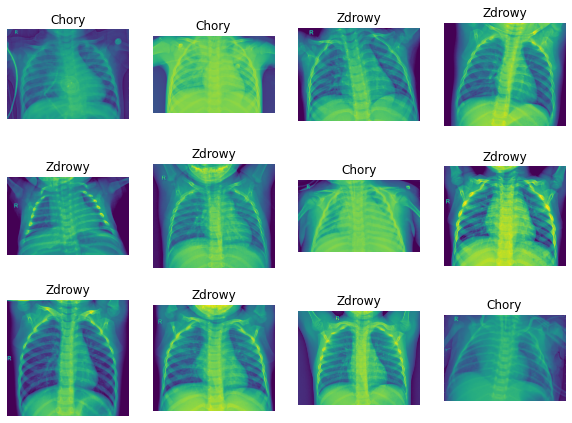

In [30]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,4,i+1)
    r=random.randint(0,1)
    img = view_random_image(data_dir, class_names[r]) 

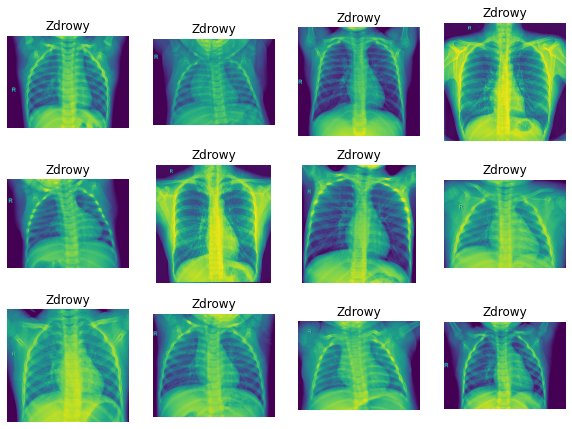

In [8]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,4,i+1)
    r=0
    img = view_random_image(data_dir, class_names[r]) 

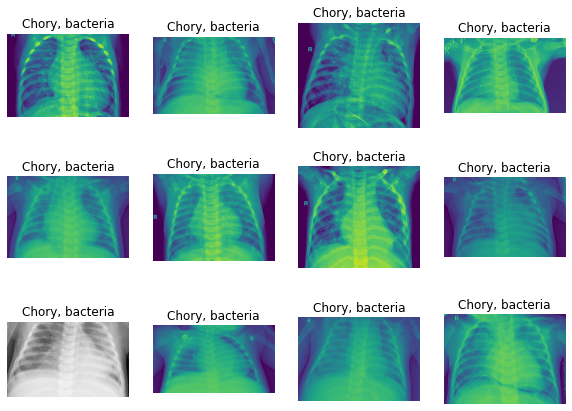

In [15]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,4,i+1)
    r=1
    img = view_each_type(data_dir, class_names[r], "bacteria") 

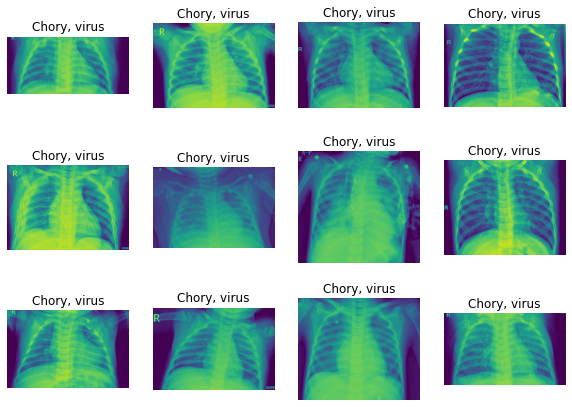

In [14]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,4,i+1)
    r=1
    img = view_each_type(data_dir, class_names[r], "virus") 